# 문제 개요

이 문제는 실제 Programmers 채용 공고 페이지를 방문한 개발자들의 방문/지원 기록을 바탕으로 추천모델을 만들어보는 것이다. 참고로 모든 데이터는 익명화되었음을 밝힌다. 구체적으로 개발자(userID로 표현됨)와 채용공고(jobID로 표현됨)를 보고 개발자가 해당 채용공고에 지원할지 안 할지를 예측하는 Binary Classifier를 만드는 것이다. 이 모델을 만드는데 필요한 feature들은 부가적으로 제공되는 데이터 파일들을 바탕으로 만들어내면 되며 이에 대해서는 뒤의 데이터 세트 섹션에서 설명한다.

# 데이터 세트 설명

이 문제를 해결하는데 필요한 데이터들은 다음과 같은 6개의 파일에 들어있으며 각 파일에 관해 설명한다.

## train.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,jobID,applied
>
>fe292163d06253b716e9a0099b4,0
>
>6377fa90618fae77571e8dc90d9,0
>
>8ec0888a5b04139be0dfe942c7e,1
>
>f862b39f767d3a1991bdeb2ea14,0

첫 번째 칼럼은 개발자의 ID이고 두 번째 칼럼은 구인공고(이후 “잡”이라 표현)의 ID가 된다. 마지막 세 번째 칼럼은 개발자가 해당 구인공고를 보고 지원을 했는지 여부를 나타낸다. 앞서 이야기했듯이 이번에 만들어볼 추천모델은 개발자와 잡의 페어를 보고 지원 여부를 예측하는 것이다. 이를 위해서는 개발자와 잡에 대한 세부 정보가 필요한데 뒤에 나오는 4개의 파일에서 그런 정보들(Features)을 추출할 수 있다.

## job_tags.csv
이 파일의 처음 5줄은 다음과 같다:

> jobID,tagID
>
>320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
>
>e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
>
>e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
>
>e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d

이 파일은 각 잡의 키워드(tagID)들을 나타낸다. 하나의 잡에는 여러 개의 키워드가 존재할 수 있다. tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다.

## user_tags.csv
이 파일의 처음 5줄은 다음과 같다:

>userID,tagID
>
>e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
>
>e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
>
>e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
>
>e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53

이 파일은 각 개발자가 관심사로 등록한 키워드(tagID)들을 나타낸다. 한 개발자가 여러 개의 키워드를 등록할 수 있다. 앞서 job_tags.csv처럼 tagID에 해당하는 키워드가 뭔지 알고 싶다면 뒤에서 설명하는 tags.csv를 참조하면 된다. 예를 들어 tagID가 1189인 키워드는 JUnit이다.

## tags.csv
이 파일의 처음 5줄은 다음과 같다:

>tagID,keyword
>
>602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
>
>e3251075554389fe91d17a794861d47b,Tensorflow
>
>a1d50185e7426cbb0acad1e6ca74b9aa,Docker
>
>884d79963bd8bc0ae9b13a1aa71add73,Git

앞에서 이 파일은 이미 두 번 설명한 셈인데 tagID에 해당하는 실제 키워드가 무엇인지 기술한다.

## job_companies.csv
이 파일의 처음 5줄은 다음과 같다:

>companyID,jobID,companySize
>
>00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,
>
>1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
>
>89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
>
>acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10

이 파일은 잡과 관련된 회사가 어디인지 그 정보를 보여주는데 별다른 정보는 없고 회사의 규모를 보여주는 필드가 존재하는데 이 필드는 옵션 필드이다 (값이 존재하지 않을 수 있음). 이 정보를 통해 어떤 잡들이 어느 회사에서 나온 것이고 그 회사의 크기는 어떻게 되는지 알 수 있다.

## test.csv
이 파일이 바로 최종 예측 모델의 입력이 되는 파일로 처음 다섯 줄은 다음과 같다:

>userID,jobID
>
>ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
>
>9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
>
>33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
>
>ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f

라인마다 userID와 jobID가 있고 이 개발자가 이 잡에 지원을 할지 말지 예측을 하면 된다.

# 최종 제출 파일

- 최종 제출 파일은 applied 필드를 가지는 csv파일이며 test.csv에서 나오는 user가 지원했을지 여부를 값으로 가져야 한다. (1이면 지원을 나타내고 0이면 지원하지 않음을 나타냄)

- 최종 제출 파일의 n번째 줄값은 test.csv의 n번째 줄 사용자에 대한 예측값이어야 한다.


# 데이터 관련 안내

- 작성한 코드의 저작권은 응시자에게 있음

- 데이터의 저작권은 그렙에 있으므로 제3자에게 공유하거나 개인적인 용도로 사용할 수 없으며, 외부 블로그 등에 공개 불가

- 그렙에서 사용하기 위해 데이터를 제공하는 것이 아니며, 실전 데이터를 제공해서 평가 진행하기 위해 제공함

- 모델 학습을 위해 외부 데이터 및 모델(pre-trained model)을 사용 불가


# 채점 방식
- Accuracy 100%

# 이 과제에 대한 나의 접근 방법

- 우선 각 항목별로 주어진 데이터가 많고, 모델을 훈련시키기 전에 충분한 EDA가 필요해보인다.
- 단순한 이진 분류 모델이지만, XGBoost 등 여러가지 모델을 사용해보는 것이 가능한 것으로 보인다.

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# 1. 훈련 데이터 압축 풀어주기
local_zip = './train_job.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.')
zip_ref.close()

In [3]:
# 2. train.csv 파일 pandas로 읽어들이기

train_all = pd.read_csv("./train.csv")

train_all

,userID,jobID,applied
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0
...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0


In [4]:
# 3. job_tags 파일 pandas로 읽어들이기

job_tags = pd.read_csv('./job_tags.csv')

job_tags

,jobID,tagID
0,320722549d1751cf3f247855f937b982,d38901788c533e8286cb6400b40b386d
1,e744f91c29ec99f0e662c9177946c627,3948ead63a9f2944218de038d8934305
2,e744f91c29ec99f0e662c9177946c627,0e095e054ee94774d6a496099eb1cf6a
3,e820a45f1dfc7b95282d10b6087e11c0,7d771e0e8f3633ab54856925ecdefc5d
4,e820a45f1dfc7b95282d10b6087e11c0,6c8dba7d0df1c4a79dd07646be9a26c8
...,...,...
3472,b4a528955b84f584974e92d025a75d1f,bb04af0f7ecaee4aae62035497da1387
3473,6c8dba7d0df1c4a79dd07646be9a26c8,3bf55bbad370a8fcad1d09b005e278c2
3474,6c8dba7d0df1c4a79dd07646be9a26c8,0e9fa1f3e9e66792401a6972d477dcc3
3475,6c8dba7d0df1c4a79dd07646be9a26c8,0c048b3a434e49e655c1247efb389cec


In [5]:
# 4. user_tags 파일 pandas로 읽어들이기

user_tags = pd.read_csv('./user_tags.csv')

user_tags

,userID,tagID
0,e576423831e043f7928d9ac113abbe6f,82c2559140b95ccda9c6ca4a8b981f1e
1,e576423831e043f7928d9ac113abbe6f,2ba8698b79439589fdd2b0f7218d8b07
2,e576423831e043f7928d9ac113abbe6f,351b33587c5fdd93bd42ef7ac9995a28
3,e576423831e043f7928d9ac113abbe6f,81e5f81db77c596492e6f1a5a792ed53
4,e576423831e043f7928d9ac113abbe6f,0e095e054ee94774d6a496099eb1cf6a
...,...,...
17189,3ab88dd28f749fe4ec90c0b6f9896eb5,801c14f07f9724229175b8ef8b4585a8
17190,3ab88dd28f749fe4ec90c0b6f9896eb5,95151403b0db4f75bfd8da0b393af853
17191,3ab88dd28f749fe4ec90c0b6f9896eb5,f47330643ae134ca204bf6b2481fec47
17192,15d84e9a5eceb67bcb8fb0e8c839a903,285f89b802bcb2651801455c86d78f2a


In [6]:
# 5. tags 파일 pandas로 읽어들이기
# Distinct하게 tagID가 있는 것은 887개
tags = pd.read_csv('./tags.csv')

tags

,tagID,keyword
0,602d1305678a8d5fdb372271e980da6a,Amazon Web Services(AWS)
1,e3251075554389fe91d17a794861d47b,Tensorflow
2,a1d50185e7426cbb0acad1e6ca74b9aa,Docker
3,884d79963bd8bc0ae9b13a1aa71add73,Git
4,4122cb13c7a474c1976c9706ae36521d,Python
...,...,...
882,818f4654ed39a1c147d1e51a00ffb4cb,활용
883,7cce53cf90577442771720a370c3c723,mybais
884,c2aee86157b4a40b78132f1e71a9e6f1,*
885,1fb2a1c37b18aa4611c3949d6148d0f8,Autodesk Maya


In [7]:
# 6. job_companies 파일 pandas로 읽어들이기

job_companies = pd.read_csv('./job_companies.csv')

job_companies

,companyID,jobID,companySize
0,00411460f7c92d2124a67ea0f4cb5f85,e5f6ad6ce374177eef023bf5d0c018b6,NaN
1,1905aedab9bf2477edc068a355bba31a,185e65bc40581880c4f2c82958de8cfe,11-50
2,89fcd07f20b6785b92134bd6c1d0fa42,0537fb40a68c18da59a35c2bfe1ca554,101-200
3,acf4b89d3d503d8252c9c4ba75ddbf6d,b7ee6f5f9aa5cd17ca1aea43ce848496,1-10
4,fb7b9ffa5462084c5f4e7e85a093e6d7,efe937780e95574250dabe07151bdc23,NaN
...,...,...,...
728,b5dc4e5d9b495d0196f61d45b26ef33e,fa3a3c407f82377f55c19c5d403335c7,51-100
729,2dace78f80bc92e6d7493423d729448e,d7a728a67d909e714c0774e22cb806f2,51-100
730,443cb001c138b2561a0d90720d6ce111,d81f9c1be2e08964bf9f24b15f0e4900,NaN
731,b5b41fac0361d157d9673ecb926af5ae,ae0eb3eed39d2bcef4622b2499a05fe6,NaN


In [8]:
# 7. test 파일 pandas로 읽어들이기

test = pd.read_csv("./test_job.csv")

test

,userID,jobID
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4
...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca


# 1. EDA 진행하기

## 1 - 1) train.csv 파일의 EDA

- 유저들이 확인한 구인 공고 중에 가장 많은 지원이 이뤄진 회사는 어디인가?
- userID는 Distinct한 정보만 모여져 있는가? 아니면 한 유저가 여러 회사를 열람한 정보가 모여져 있는가?

In [9]:
# 전체 유저는 196명에 해당. 한 유저가 여러 회사를 열람한 경우가 해당됨.
train_all["userID"].value_counts()

b052e2e0c0ad1b2d5036bd56e27d061c    106
6bc5d37951120d6d49672ce647c4e563     95
d41e0e6f6f1e29098d9d152511503ab2     93
8c19f571e251e61cb8dd3612f26d5ecf     86
42c2cc0b74b0f4a3a7e52d1ff617e05e     85
                                   ... 
d52d50218e9abe66438cefaee22a28da      9
0e010fbd16cca07dc2c06d8745c0709a      9
3edc356b112be4cda9472f2e37549e7d      8
624e7e301007d8d328d40f56c948a8ba      6
015b469419f616144c13e0194f880af7      2
Name: userID, Length: 196, dtype: int64

In [10]:
# 좀 더 가시적인 시각화
train_all.sort_values(by="userID", axis=0)

,userID,jobID,applied
1927,0004289ee1c7b8b08c77e19878106ae3,50c3d7614917b24303ee6a220679dab3,0
4376,0004289ee1c7b8b08c77e19878106ae3,4a213d37242bdcad8e7300e202e7caa4,1
635,0004289ee1c7b8b08c77e19878106ae3,e5f6ad6ce374177eef023bf5d0c018b6,0
3765,0004289ee1c7b8b08c77e19878106ae3,ffeed84c7cb1ae7bf4ec4bd78275bb98,1
855,0004289ee1c7b8b08c77e19878106ae3,4da04049a062f5adfe81b67dd755cecc,0
...,...,...,...
1688,fe292163d06253b716e9a0099b42031d,6e2713a6efee97bacb63e52c54f0ada0,0
21,fe292163d06253b716e9a0099b42031d,26337353b7962f533d78c762373b3318,0
1858,fe292163d06253b716e9a0099b42031d,d64a340bcb633f536d56e51874281454,0
5299,fe292163d06253b716e9a0099b42031d,839ab46820b524afda05122893c2fe8e,0


In [11]:
# 전체 회사는 708개가 있다.
train_all["jobID"].value_counts()

da0d1111d2dc5d489242e60ebcbaf988    50
96b9bff013acedfb1d140579e2fbeb63    50
0f840be9b8db4d3fbd5ba2ce59211f55    48
69cb3ea317a32c4e6143e665fdb20b14    44
e5f6ad6ce374177eef023bf5d0c018b6    42
                                    ..
d7a728a67d909e714c0774e22cb806f2     1
9f36407ead0629fc166f14dde7970f68     1
e4bb4c5173c2ce17fd8fcd40041c068f     1
f8c1f23d6a8d8d7904fc0ea8e066b3bb     1
a113c1ecd3cace2237256f4c712f61b5     1
Name: jobID, Length: 708, dtype: int64

In [12]:
# 전체 회사 중에 실제 지원이 이뤄진 회사는 346개
train_all["jobID"][train_all["applied"]==1].value_counts()

883e881bb4d22a7add958f2d6b052c9f    18
f73b76ce8949fe29bf2a537cfa420e8f    17
27ed0fb950b856b06e1273989422e7d3    17
ad972f10e0800b49d76fed33a21f6698    16
da0d1111d2dc5d489242e60ebcbaf988    11
                                    ..
cbcb58ac2e496207586df2854b17995f     1
df6d2338b2b8fce1ec2f6dda0a630eb0     1
15d4e891d784977cacbfcbb00c48f133     1
68053af2923e00204c3ca7c6a3150cf7     1
ccb1d45fb76f7c5a0bf619f979c6cf36     1
Name: jobID, Length: 346, dtype: int64

In [13]:
# user 계정에서 설정되어 있는 각 태그들의 갯수 세기
train_all['user_tags_counts'] = 0

for i in range(len(train_all)):
    train_all['user_tags_counts'].iloc[i] =len(user_tags[user_tags['userID'] == train_all['userID'].iloc[i]])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [14]:
train_all['job_tags_counts'] = 0

for i in range(len(train_all)):
    train_all['job_tags_counts'].iloc[i] =len(job_tags[job_tags['jobID'] == train_all['jobID'].iloc[i]])


In [15]:
job_tags[job_tags['jobID'] =='15de21c670ae7c3f6f3f1f37029303c9']

,jobID,tagID
948,15de21c670ae7c3f6f3f1f37029303c9,a9078e8653368c9c291ae2f8b74012e7
2687,15de21c670ae7c3f6f3f1f37029303c9,d38901788c533e8286cb6400b40b386d


In [16]:
user_tags[user_tags['userID'] == '8ec0888a5b04139be0dfe942c7eb4199' ]['tagID']

7531     f91e24dfe80012e2a7984afa4480a6d6
7897     aace49c7d80767cffec0e513ae886df0
7898     d2ed45a52bc0edfa11c2064e9edee8bf
8613     58ae749f25eded36f486bc85feb3f0ab
8614     3948ead63a9f2944218de038d8934305
8615     4e2545f819e67f0615003dd7e04a6087
8616     26588e932c7ccfa1df309280702fe1b5
8685     4e2545f819e67f0615003dd7e04a6087
8686     26588e932c7ccfa1df309280702fe1b5
9195     58ae749f25eded36f486bc85feb3f0ab
9196     3948ead63a9f2944218de038d8934305
9359     4e2545f819e67f0615003dd7e04a6087
9360     26588e932c7ccfa1df309280702fe1b5
9361     f91e24dfe80012e2a7984afa4480a6d6
9432     58ae749f25eded36f486bc85feb3f0ab
9433     3948ead63a9f2944218de038d8934305
9563     4e2545f819e67f0615003dd7e04a6087
9564     26588e932c7ccfa1df309280702fe1b5
10279    f91e24dfe80012e2a7984afa4480a6d6
10280    aace49c7d80767cffec0e513ae886df0
10281    d2ed45a52bc0edfa11c2064e9edee8bf
10350    aace49c7d80767cffec0e513ae886df0
10351    d2ed45a52bc0edfa11c2064e9edee8bf
11023    aace49c7d80767cffec0e513a

In [17]:
def calculate_tags_ratio(userID, jobID):
    user_tag_list = []
    job_tag_list = []
    val = []
    user_tag_list = user_tags[user_tags['userID'] == userID ]['tagID'].tolist()
    job_tag_list = job_tags[job_tags['jobID'] == jobID ]['tagID'].tolist()
    
    
    for i in job_tag_list:
        if i in user_tag_list:
            val.append(1)
            
    return len(val)/len(job_tag_list)

In [18]:
calculate_tags_ratio('8ec0888a5b04139be0dfe942c7eb4199', '0fcbc61acd0479dc77e3cccc0f5ffca7')

0.3333333333333333

In [19]:
train_all['coincide_tags'] = 0
train_all

for i in range(len(train_all)):
    train_all['coincide_tags'].iloc[i] = calculate_tags_ratio(train_all['userID'].iloc[i], train_all['jobID'].iloc[i])


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
train_all

,userID,jobID,applied,user_tags_counts,job_tags_counts,coincide_tags
0,fe292163d06253b716e9a0099b42031d,15de21c670ae7c3f6f3f1f37029303c9,0,151,2,0.000000
1,6377fa90618fae77571e8dc90d98d409,55b37c5c270e5d84c793e486d798c01d,0,125,3,0.333333
2,8ec0888a5b04139be0dfe942c7eb4199,0fcbc61acd0479dc77e3cccc0f5ffca7,1,28,3,0.333333
3,f862b39f767d3a1991bdeb2ea1401c9c,3b5dca501ee1e6d8cd7b905f4e1bf723,0,85,5,0.600000
4,cac14930c65d72c16efac2c51a6b7f71,287e03db1d99e0ec2edb90d079e142f3,0,100,4,0.250000
...,...,...,...,...,...,...
5995,68cb94b97d00979f4e8127915885b641,b9228e0962a78b84f3d5d92f4faa000b,0,145,2,1.000000
5996,c0b199d73bdf390c2f4c3150b6ee1574,e3796ae838835da0b6f6ea37bcf8bcb7,0,76,6,0.500000
5997,3ab88dd28f749fe4ec90c0b6f9896eb5,e2a2dcc36a08a345332c751b2f2e476c,0,122,12,0.166667
5998,75b4af0dacbc119eadf4eeb096738405,3b712de48137572f3849aabd5666a4e3,0,35,4,0.250000


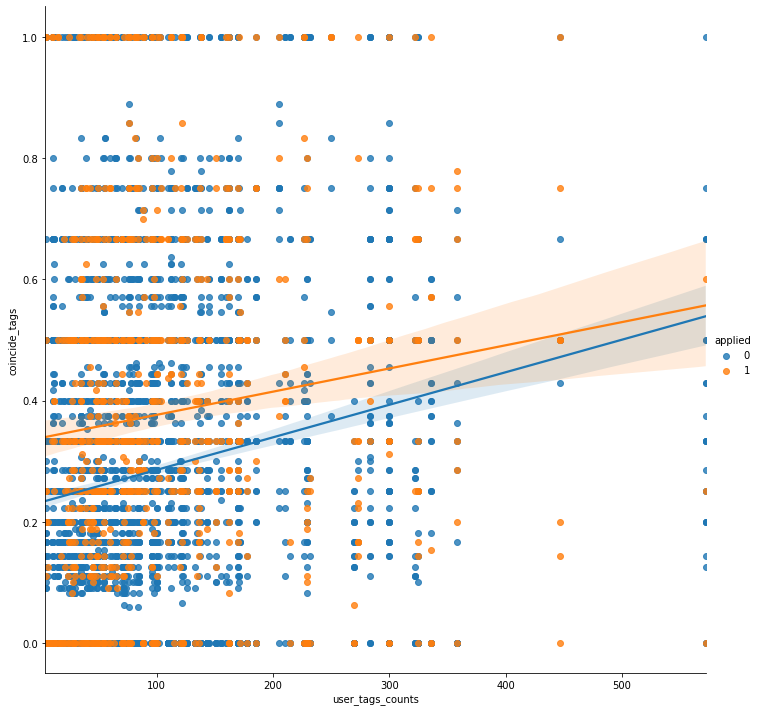

In [21]:
sns.lmplot(x="user_tags_counts", y="coincide_tags", hue="applied", height=10, data=train_all)
plt.show()

In [22]:
test

def set_df(df,user_tags,job_tags):
    
    df['user_tags_counts'] = 0

    for i in range(len(df)):
        df['user_tags_counts'].iloc[i] =len( user_tags[user_tags['userID'] == df['userID'].iloc[i]])



    #job tag counts 
    df['job_tags_counts'] = 0

    for i in range(len(df)):
        df['job_tags_counts'].iloc[i] =len( job_tags[job_tags['jobID'] == df['jobID'].iloc[i]])


    df['coincide_tags'] = 0


    for i in range(len(df)):
        df['coincide_tags'].iloc[i] = calculate_tags_ratio(df['userID'].iloc[i], df['jobID'].iloc[i])
    
    return df

a = set_df(test,user_tags,job_tags)
a

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,userID,jobID,user_tags_counts,job_tags_counts,coincide_tags
0,ebaee1af0c501f22ddfe242fc16dae53,352407221afb776e3143e8a1a0577885,143,7,0.428571
1,9ab05403ac7808cbfba3da26665f7a9c,96b9bff013acedfb1d140579e2fbeb63,48,7,0.142857
2,33349e909eba71677299d2fc97e158b7,58d4d1e7b1e97b258c9ed0b37e02d087,78,7,0.142857
3,ac985a9db5faeb44c94a334430ccc241,ccb0989662211f61edae2e26d58ea92f,15,4,0.000000
4,d41e0e6f6f1e29098d9d152511503ab2,4a213d37242bdcad8e7300e202e7caa4,100,6,0.000000
...,...,...,...,...,...
2430,01ed443356f762e9132b58f8c80e131d,26e359e83860db1d11b6acca57d8ea88,82,4,0.000000
2431,946aa0c612952da8d67dd338a43d5929,c0f168ce8900fa56e57789e2a2f2c9d0,30,3,0.666667
2432,ce840aa9583592e71f3db26ee6e41703,8065d07da4a77621450aa84fee5656d9,170,4,0.500000
2433,946aa0c612952da8d67dd338a43d5929,a0160709701140704575d499c997b6ca,30,3,0.333333


In [23]:
X = train_all[['user_tags_counts','coincide_tags']]
y = train_all[['applied']]

test_df_X = test[['user_tags_counts','coincide_tags']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [25]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# 실행하는데 속도가 너무 느리다..;
# xgb = xgb.XGBClassifier()


# grid = {
#     "n_estimators" : [200,400],
#     "learning_rate" : [0.1, 0.2],
#     "max_depth" : [4,6]
# }

# xgb_grid = GridSearchCV(xgb, param_grid=grid, scoring="accuracy", n_jobs=-1, verbose=1)

# xgb_grid.fit(X_train,y_train)

In [26]:
# print("XGBoost 최고 평균 정확도 : {0: .4f}".format(xgb_grid.best_score_))
# print("최고 파라미터", xgb_grid.best_params_)

In [27]:
model = xgb.XGBClassifier(learning_rate=0.08,max_depth=2,n_estimators=200) 

# 모델 훈련
model.fit(X_train,y_train, verbose = 1) 

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1194: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[14:40:17] WARNING: /tmp/xgboost/src/learner.cc:1094: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.08, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
model.score(X_test,y_test)

0.8783333333333333

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
test_df_y = model.predict(test_df_X)

In [31]:
result = pd.DataFrame(test_df_y)

In [32]:
result

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [33]:
test_df = pd.read_csv("./sample_output_job.csv")
# test_df
test_df = result
test_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
2430,0
2431,0
2432,0
2433,0


In [34]:
test_df.to_csv('recommendation.csv', index=False)